# Principal Component Analysis

In today's data-driven world, we're often overwhelmed by large and complex datasets. Manually analyzing this data can be time-consuming and often impractical. That's where dimensionality reduction techniques like Principal Component Analysis (PCA) come in handy. These methods help us simplify complex data into a format that's easier to work with and understand.

In this tutorial, you'll gain hands-on experience with PCA.

#### Key Topics

- The mathematical foundations of PCA: What makes it tick?
- Step-by-step guide on implementing PCA: You'll learn to compute essential components like the covariance matrix, eigenvectors, and eigenvalues.
- Visualization techniques: See how to take high-dimensional data and visualize it in a more accessible, lower-dimensional format.
- Interpreting results: Best practices for making sense of what you see.

By mastering these concepts and techniques, you'll be better equipped to handle large and complicated datasets in your future projects. This tutorial is designed for anyone who wants to improve their data analysis skills, whether you're a beginner or have some experience.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
%matplotlib inline

#### The Pokemon Dataset

Before diving into PCA, we need to load our dataset. In this section, we'll explore how to load and preprocess the dataset, which consists of Pokemon images.

- **Data Structure**: The dataset is a 2D array, where each row represents a greyscale image of a Pokemon sprite.
- **Image Dimensions**: Each image is 64x64 pixels, resulting in a total of 4096 pixels per image.
- **Pixel Values**: Pixel intensity values are floating-point numbers between 0 and 1, where 0 stands for white and 1 for black.



In [3]:
# Load the dataset using np.loadtxt
data = np.load('pokemon_sample_tutorial_week9a.npz')
images = data["images"]

# Check the shape of the loaded data
print("Shape of the loaded images:", images.shape)

Shape of the loaded images: (1168, 4096)


## PCA: A Step-By-Step Guide

### Diving Into the Math

Imagine you're a data scientist, and you're staring at a pile of data points, wondering how to make sense of them. Specifically, you have $ N $ data points $ \{\mathbf{x}_n\}_{n=1}^N $, with each point $ \mathbf{x}_n $ as a column vector in $ \mathbb{R}^D $.

#### Step 1: Centering the Data

The first thing to do is find the 'average' point in your dataset, known mathematically as the mean vector $ \bar{\mathbf{x}} $:

$$
\bar{\mathbf{x}} = \dfrac{1}{N}\sum_{n=1}^{N}\mathbf{x}_n
$$

Why is this step important? Well, by subtracting this mean from all your data points, you effectively center them around the origin:

$$
\mathbf{x}_n \leftarrow \mathbf{x}_n - \bar{\mathbf{x}}
$$

#### Step 2: Computing the Covariance Matrix

Next, we need to understand how the data points are related to each other. This understanding comes through the covariance matrix $ \mathbf{S} $:

$$
\mathbf{S} = \dfrac{1}{N}\sum_{n=1}^N (\mathbf{x}_n \mathbf{x}_n^T)
$$

In simpler terms, you can think of the covariance matrix as capturing the 'shape' of your cloud of data points. 

You can also express it in a sleek matrix form:

$$
\mathbf{S} = \dfrac{1}{N} X X^T
$$

Here, $ X \in \mathbb{R}^{D \times N} $ is the zero-centered data matrix, where every column is a zero-centered data point.

### SVD in PCA

#### A Primer on SVD

So, what is SVD? Singular Value Decomposition, or SVD for short, is like a magician in the world of matrices. Given any matrix $ A $, it can break it down into three other matrices $ U $, $ \Sigma $, and $ V^T $, where we have $U^T U = {\rm Id}$ and $V^T V = {\rm Id}$, and $\Sigma$ a diagonal matrix.

$$
A = U \Sigma V^T
$$

#### Why SVD Rocks in PCA

Here's why SVD is a game-changer: it directly fetches us the principal components without requiring us to even look at the covariance matrix $ \mathbf{S} $.

Let's do some math magic. We assume that our zero-centered data matrix $ X $ can be decomposed as $ X^T = U \Sigma V^T $. Here we run SVD on the $X^T \in \mathbb{R}^{N \times D}$ because it is more common to have the data as row matrices, implying $ X = V \Sigma U^T $.

So, the covariance matrix $ \mathbf{S} $ can be reimagined like so:

$$
\mathbf{S} = \dfrac{1}{N} X X^T = \dfrac{1}{N} (U \Sigma V^T)^T (U \Sigma V^T) = \dfrac{1}{N} V \Sigma^2 V^T 
$$

This is a convenient form because $ \Sigma^2 $ is already a diagonal matrix. Essentially, this means that the columns of $ V $ are the eigenvectors of $\mathbf{S}$ and hence our principal components, and the corresponding eigenvalues are the squared singular values of $ X $ divided by $ N $.

#### From Math to Machine

Finally, let's talk code. You'd typically start your PCA journey by running an SVD algorithm on your zero-centered data matrix $ X $. Then you pick the columns of $ V $ that correspond to the largest singular values. These are your new, simplified coordinates.

To project your original, high-dimensional data onto this newfound paradise of simplicity, just perform the matrix multiplication $ X^T V = U \Sigma $.

In Python, especially with libraries like NumPy, the SVD and subsequent steps can be done with a few lines of code. Plus, the singular values usually come neatly sorted in descending order, making life easier.


The Python code below is divided into two main functions: 

1. `pca()`: Takes the raw data ${\bf X}$ and the number of principal components (`n_pc`) you want to reduce your data to. It returns the projected data and the principal components themselves.
  
2. `svd2pca()`: Useful when you've already computed the SVD once and wish to get a different number of principal components without recomputing the SVD.

The functions `pca()` and `svd2pca()` offer a simple yet flexible way to perform PCA, either from scratch or using a precomputed SVD. You can specify the number of principal components you want and even change that number without having to recompute the SVD, thanks to `svd2pca()`.

In [7]:
def pca(X, n_pc=2):
    """
    Perform Principal Component Analysis to reduce the dimensionality of the data.
    
    Parameters:
        X (numpy.ndarray): The original data. Each row is a data sample.
        n_pc (int): Number of principal components to use.
    
    Returns:
        tuple: (projected data, principal components, U, S, V)
    """
    # Copy the data to avoid modifying the original dataset
    X = X.copy()
    
    # Get the shape of the data matrix
    n_samples, n_features = X.shape
    
    # Step 1: Center the data by subtracting the mean of each feature
    M = np.mean(X, axis=0)
    X -= M
    
    # Step 2: Compute the Singular Value Decomposition (SVD)
    U, S, V = np.linalg.svd(X)
    
    # Step 3: Get the first 'n_pc' principal components
    components = V[:n_pc]
    
    # Step 4: Project the data onto 'n_pc' dimensions
    projected = U[:, :n_pc] * S[:n_pc]
    
    return projected, components, U, S, V


#--------------------
def svd2pca(U, S, V, n_pc=2):
    """
    Project onto a different number of principal components given a precomputed SVD.
    
    Parameters:
        U, S, V (numpy.ndarray): The SVD components.
        n_pc (int): Number of principal components to use.
        
    Returns:
        tuple: (projected data, principal components, singular values)
    """
    # Select the first 'n_pc' principal components
    components = V[:n_pc]
    
    # Project the data onto 'n_pc' dimensions
    projected = U[:, :n_pc] * S[:n_pc]
    
    return projected, components, S

## Understanding Eigen-Pokemon: A Visual Approach to PCA

In Principal Component Analysis, the principal components serve as the new "basis" for the dataset. When our data consists of images, these principal components can also be visualized as images. They are often called "Eigenimages" in the context of image datasets. These Eigenimages help us understand the primary "features" or "patterns" that capture the most variance in the dataset. 

For example, if we have a dataset of Pokemon images, the principal components (Eigen-pokemons) will be visual patterns that capture the essence of what differentiates these images. Now, let's visualize them.

The `plot_gallery` function is designed to plot a gallery of images given the image data and its corresponding titles.

- `images`: A 2D array where each row is a flattened image.
- `titles`: The titles to be displayed for each image.
- `h, w`: The height and width of each image, respectively.
- `n_row, n_col`: The number of rows and columns in the image grid.


In [6]:
def plot_gallery(images, titles, h, w, n_row=2, n_col=6):
    """
    Plot a gallery of images.
    
    Parameters:
        images (numpy.ndarray): Each row is a flattened image.
        titles (list): Titles for each subplot.
        h (int): Image height in pixels.
        w (int): Image width in pixels.
        n_row (int): Number of rows in the gallery.
        n_col (int): Number of columns in the gallery.
    """
    # Assert to make sure we have enough images and titles for the grid
    assert len(images) >= n_row * n_col
    assert len(titles) >= n_row * n_col
    
    # Initialize the plot
    fig, axes = plt.subplots(n_row, n_col, figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    
    # Flatten the axes array for easy iteration if it's multidimensional
    axes = axes.flatten()
    
    # Loop to populate the gallery
    for i, ax in enumerate(axes):
        
        # Reshape the flattened image data to 2D and plot it
        ax.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        
        # Add title and remove axis ticks
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
    plt.show()

To use `plot_gallery`, we will simply pass in the first 30 Pokemon images and their corresponding labels. The function will handle the plotting for us.

This will give you a nice gallery view of the first 30 Pokemon images in your dataset, helping you to visually comprehend the diversity and features in your data.

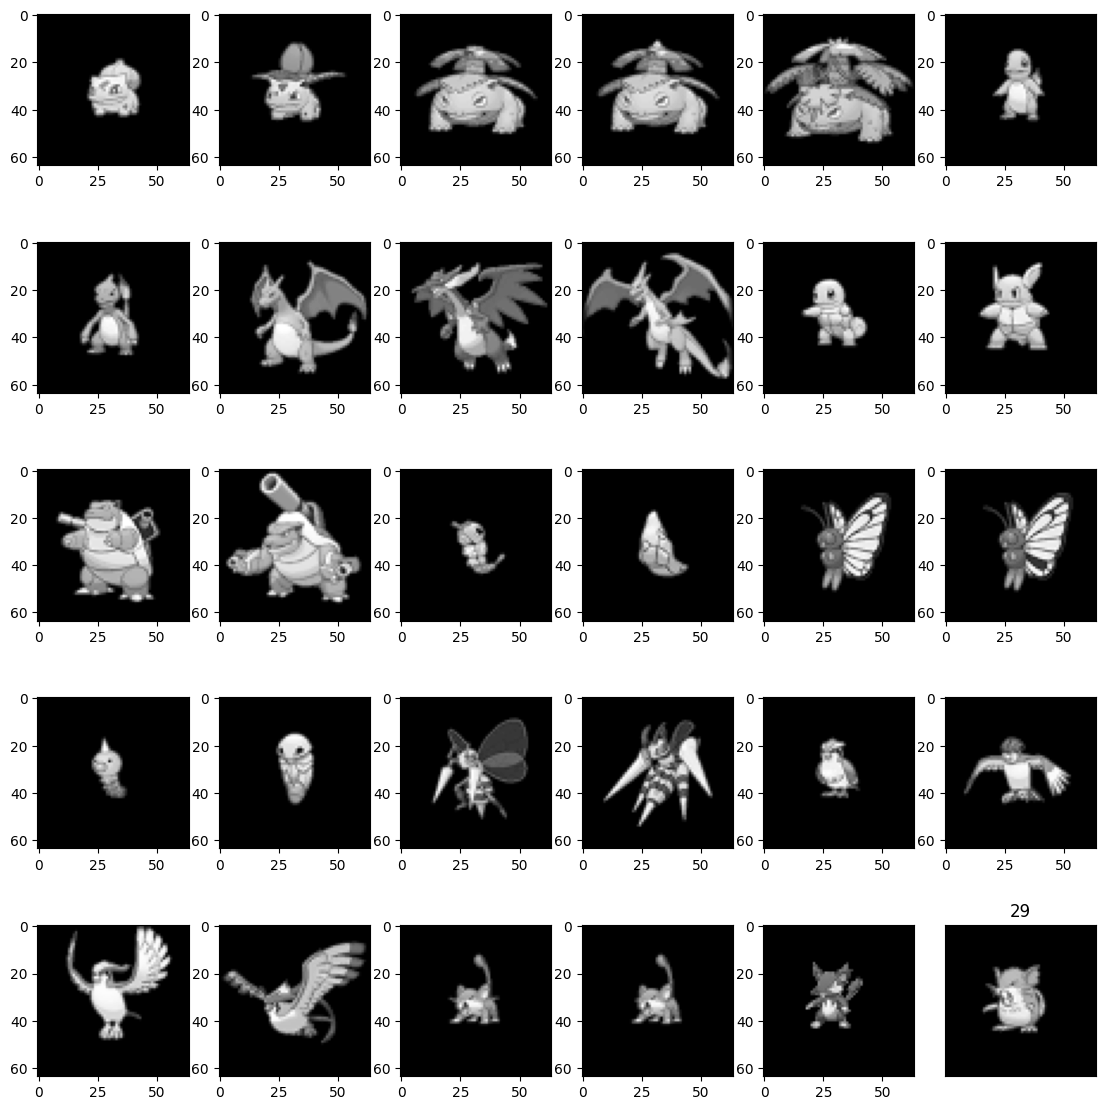

In [8]:
plot_gallery(images, np.arange(30), 64, 64, 5, 6)

## Finding and Understanding Eigen-Pokemons: Applying PCA

Having a dataset of Pokemon images, each represented in a 64x64 pixel grayscale format, we can apply PCA to uncover the underlying "Eigen-Pokemons." These Eigen-Pokemons are nothing but the principal components that capture most of the variance in our Pokemon image dataset.

#### Performing PCA on Pokemon Images

The first step is to perform PCA to obtain the first 100 principal components of the dataset. Why 100? This number is a trade-off: capturing enough information about the original data while reducing its complexity. 

Below is the code to perform PCA on the dataset.


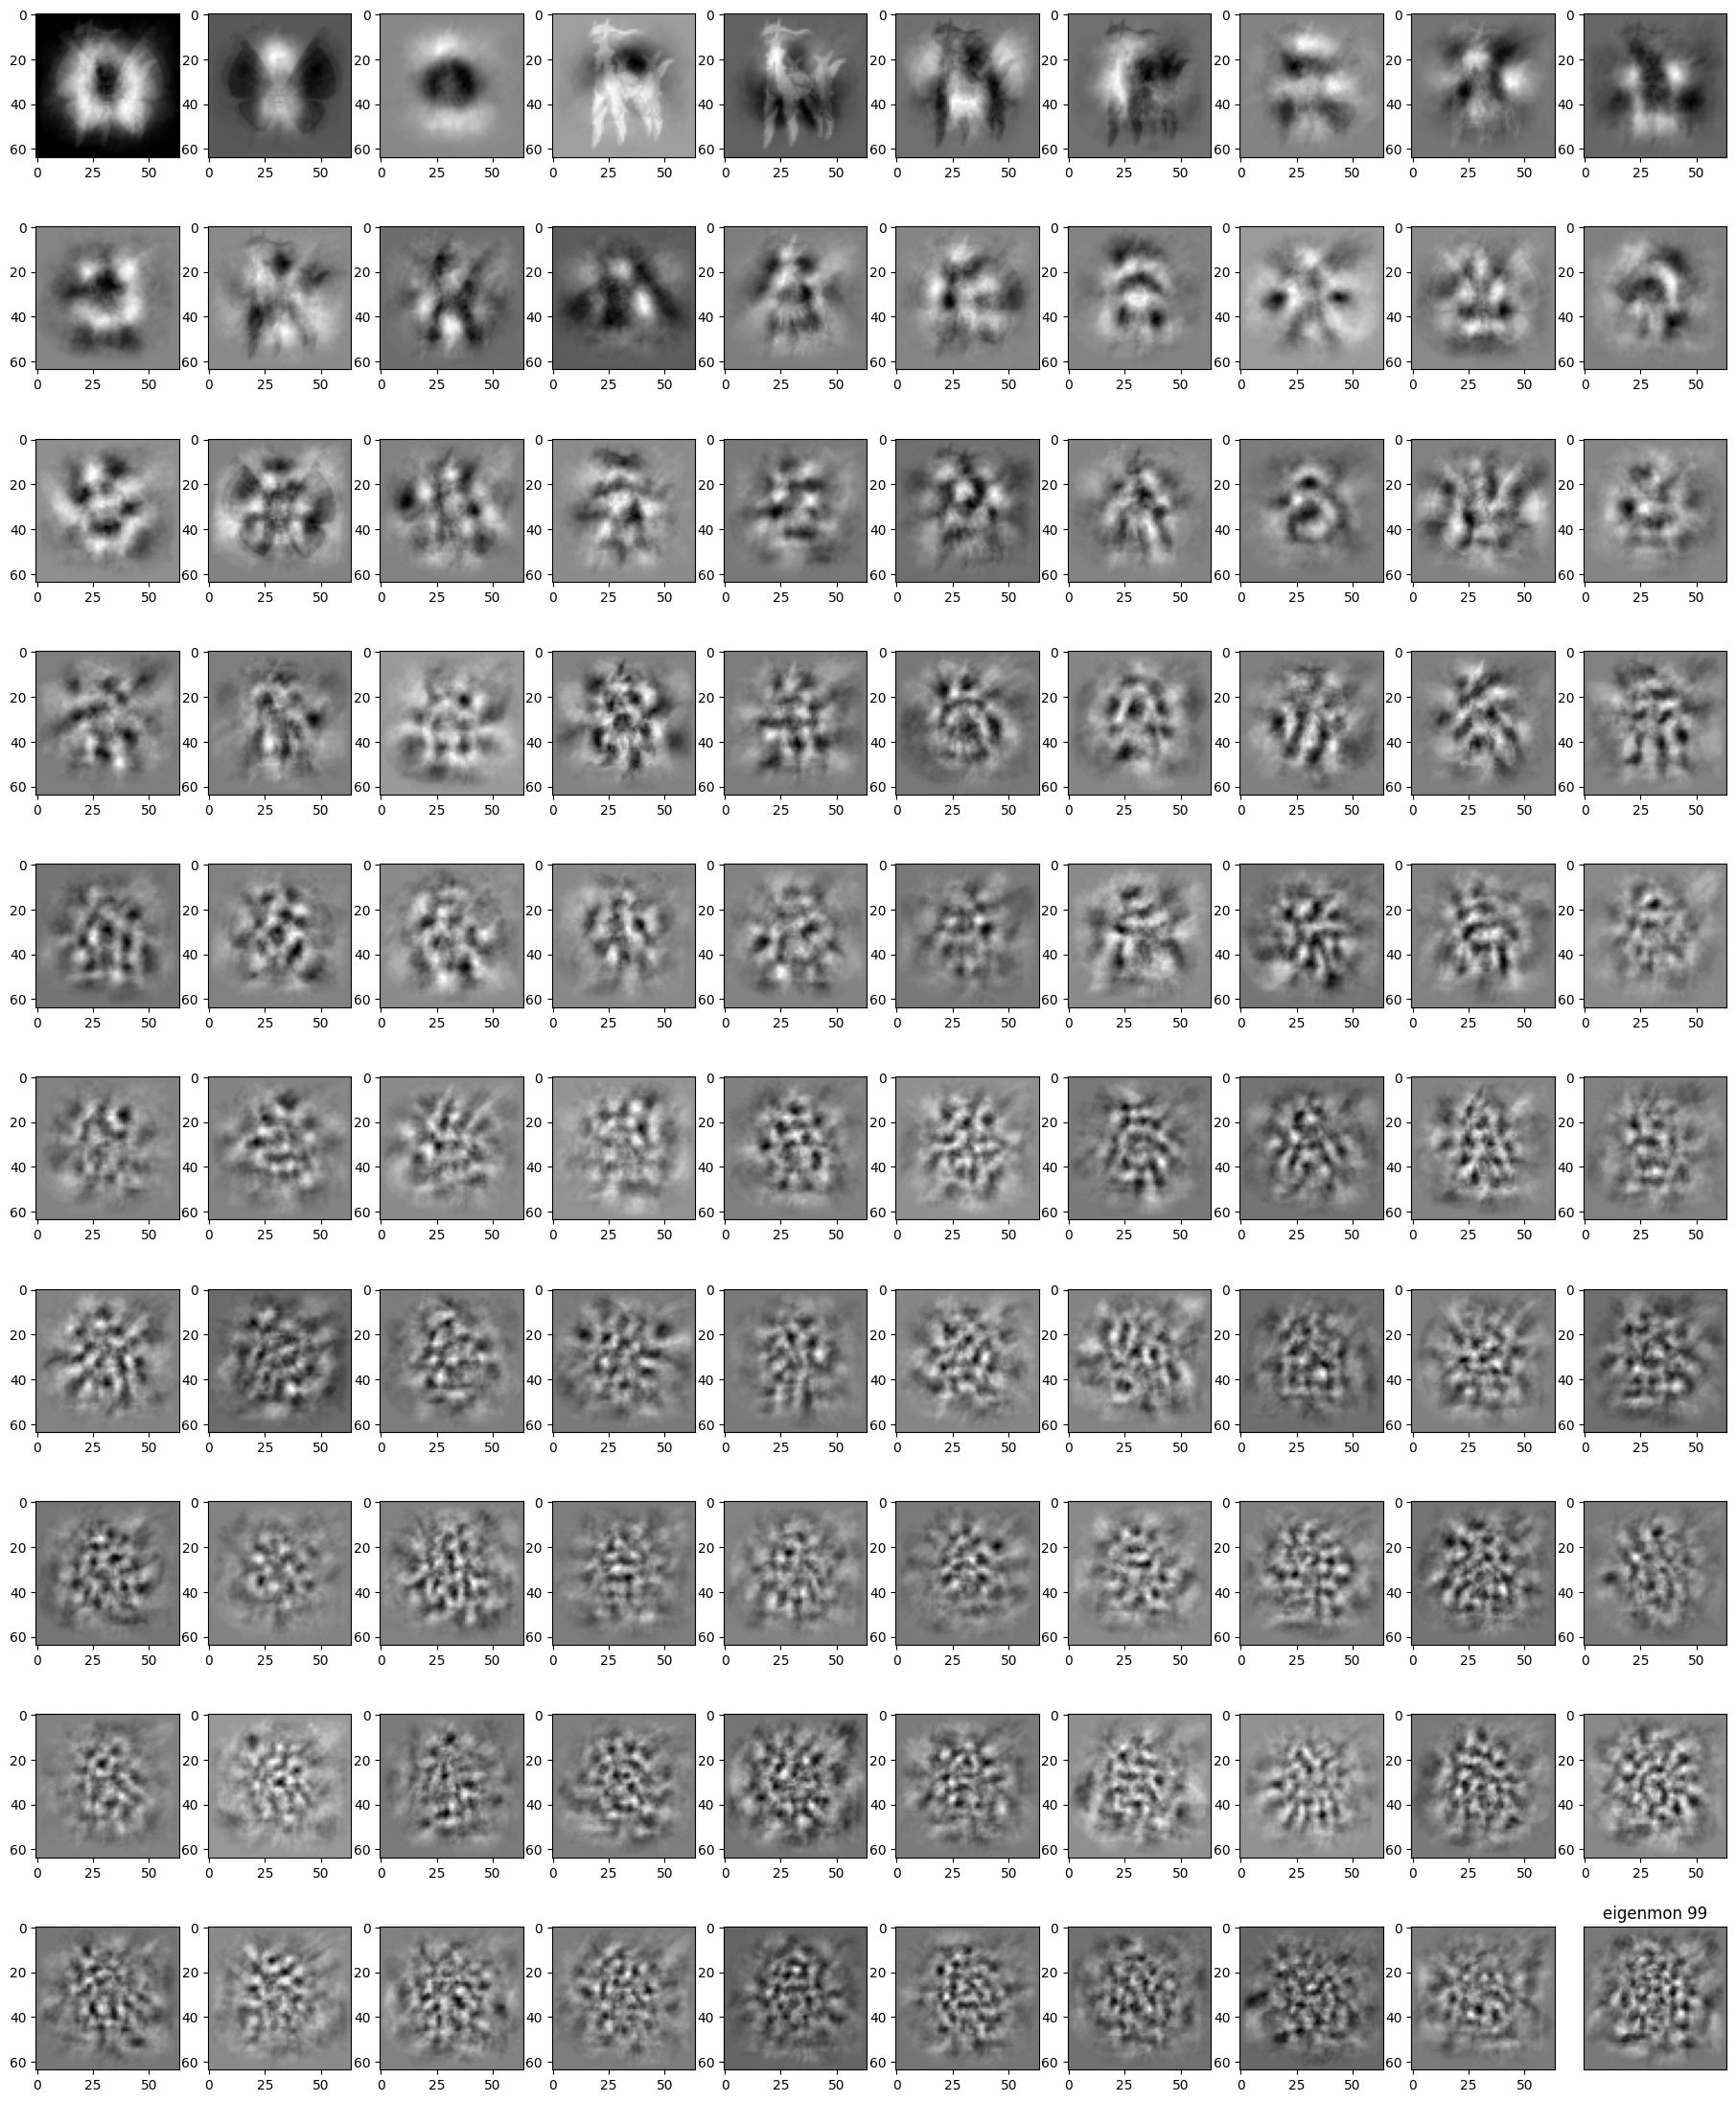

In [9]:
# Setting the parameters for PCA and the image shape
h = 64
w = 64
n_components = 100

# Perform PCA
Z, P, U, S, V = pca(images, n_pc=n_components)

# Reshaping the principal components to visualize them as images
eigenmon = P.reshape((n_components, h, w))

# Generating titles for the gallery
eigenmon_titles = ["eigenmon %d" % i for i in range(eigenmon.shape[0])]

# Use our plot_gallery function to visualize the first 100 principal components
plot_gallery(eigenmon, eigenmon_titles, h, w, n_components//10, 10)


#### 1. What do you notice about the first few principal components?

As you move through the first few Eigen-Pokemons, you'll probably notice that they capture different broad features common among Pokemon. For example, the first few capture the size, wings, head, feet and orientation, etc. These features are those that have the most variance across the dataset. 

#### 2. What are they detecting?

The principal components (Eigen-Pokemons) are essentially capturing the most prominent patterns and features that differentiate the Pokemon images in the dataset. They detect what is 'common' yet 'varying' among all the images—be it a specific shape, edge, or other characteristic features. 


### Eigenvalues and their Interpretation

The eigenvalues tell us how much variance each principal component explains. They can be interpreted as a measure of "importance" when you are aiming to approximate the diverse set of Pokemon images. Mathematically, remember that the eigenvalues $ \lambda_i $ of the covariance matrix $ \mathbf{S} $ are related to the singular values $ \Sigma_{i,i} $ of the matrix $ X $ by:

$$
\lambda_i = \dfrac{1}{N} (\Sigma_{i,i})^2
$$

This relationship is a direct result of our earlier derivation, linking the SVD decomposition of $ X $ to the principal components of $ \mathbf{S} $.

From the plot, it is evident that the first few principal components are substantially more important than the subsequent ones in terms of the variance they capture. This means they are crucial for any data approximation or compression tasks.

In the context of our Pokemon images, this indicates that we could potentially represent each Pokemon using fewer bytes of data but still retain most of the essential features that make them recognizable.


Text(0, 0.5, 'Eigenvalue')

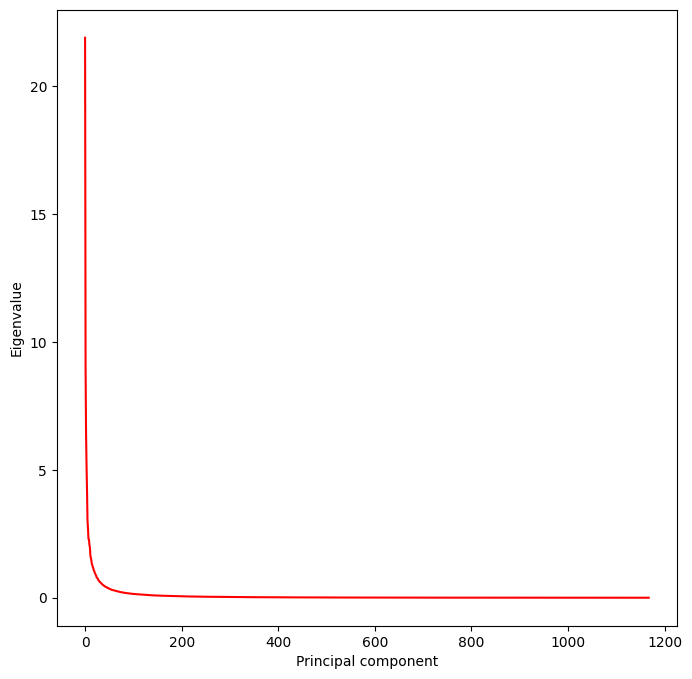

In [10]:
# Creating the figure and the line that shows the eigenvalues
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(np.arange(S.shape[0]), 1/(images.shape[0])*(S**2), 'r-')

# Labeling the plot
ax.set_xlabel('Principal component')
ax.set_ylabel('Eigenvalue')

## Reconstructing Images using Principal Components

After reducing dimensions using PCA, an interesting question is: "How well can we reconstruct the original data using only the principal components?" This is an essential query because it directly addresses the trade-off between compression and information loss.

We'll explore two cases: one where we use all 100 principal components for reconstruction, and one where we only use the first 15. The more components used, the closer the reconstruction will be to the original data, but at the cost of computational resources and storage.

To reconstruct the images, we'll reverse the PCA transformation. The reconstructed images can be computed as:

$$
\mathrm{Reconstructed} = \mathrm{Projected Data} \times \mathrm{Principal Components}^T + \mathrm{Mean}
$$


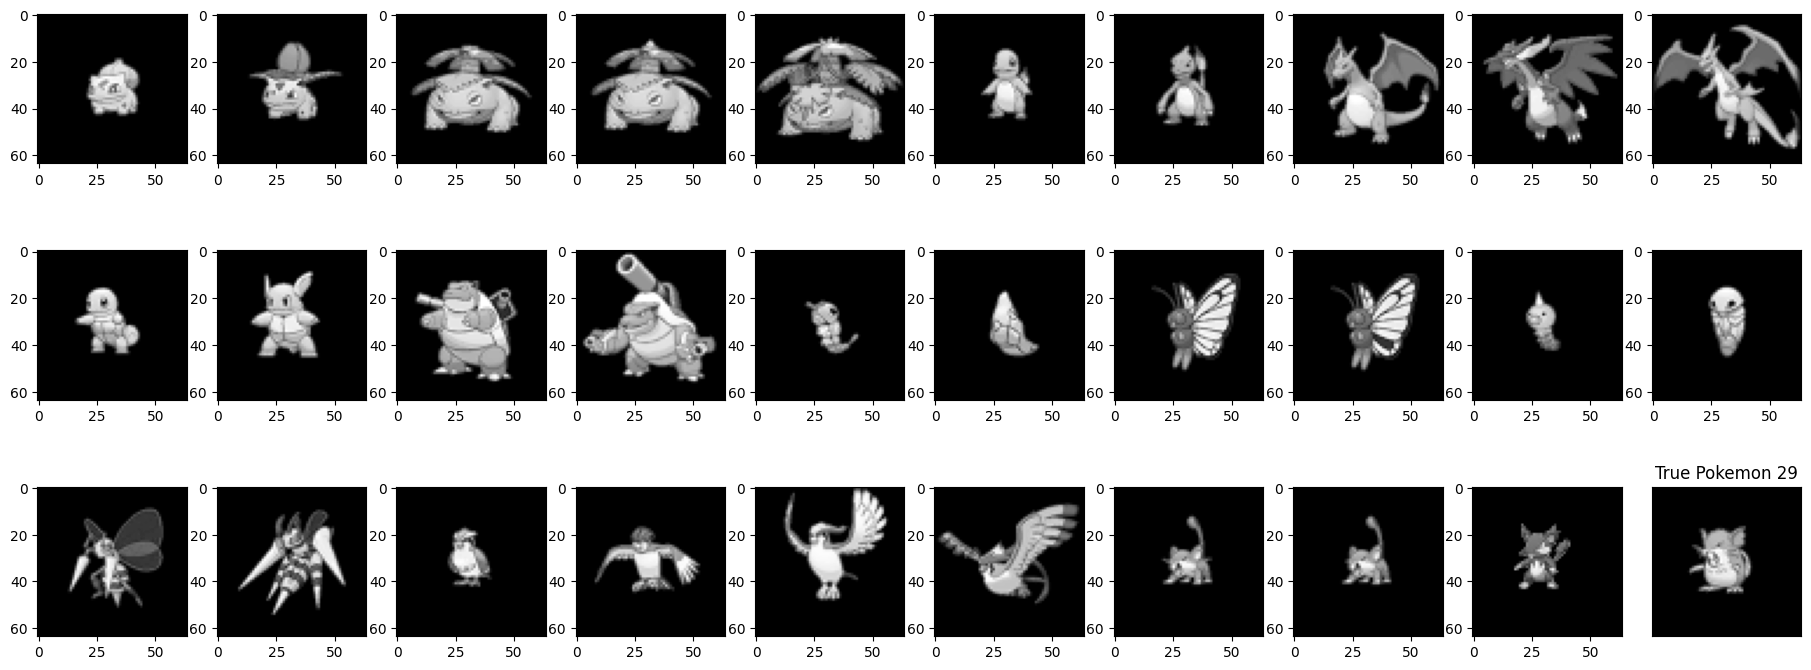

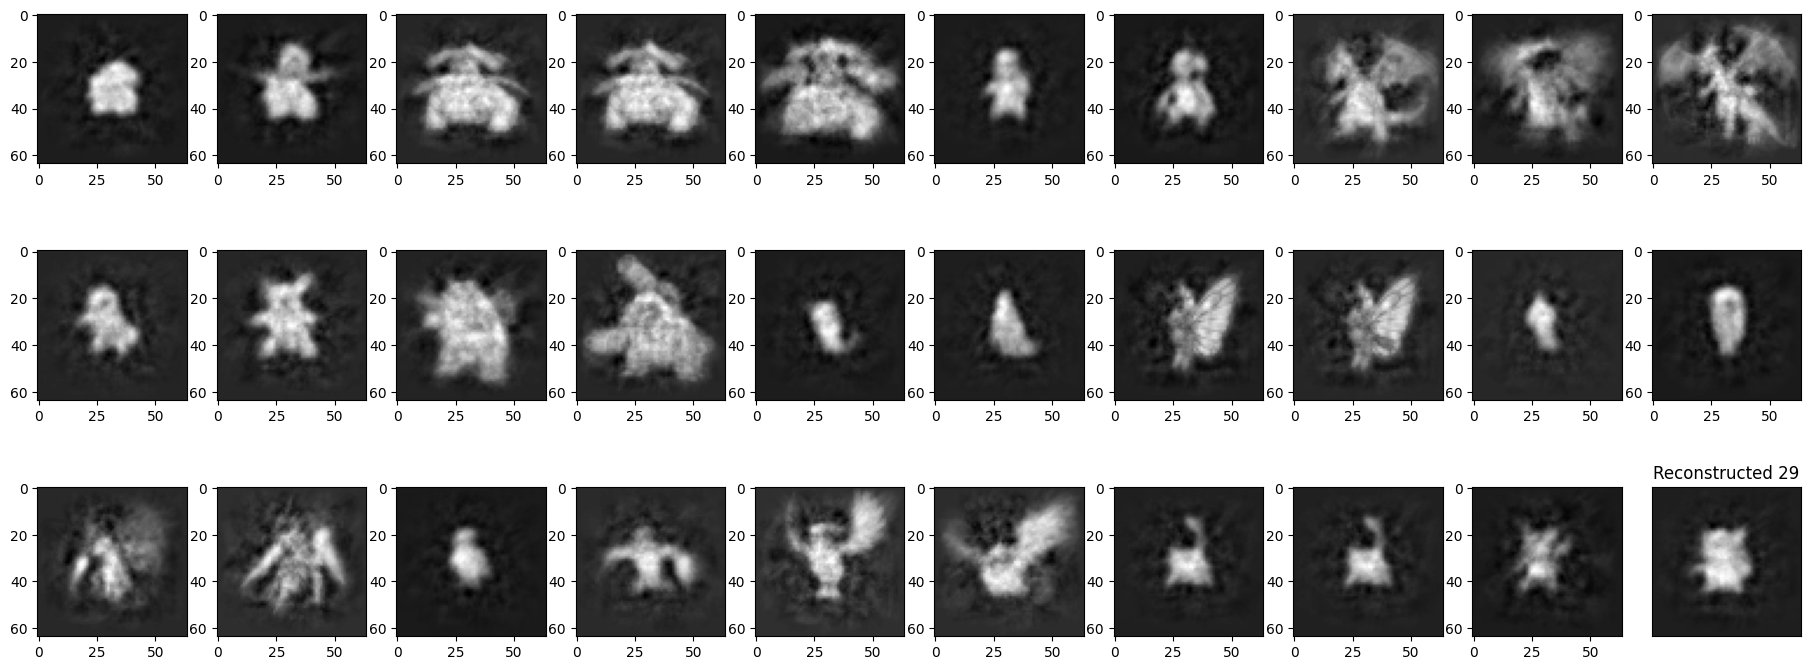

In [11]:
# Calculate the mean of the original images
M = np.mean(images, axis=0)

# Plot the original first 30 images
plot_gallery(images, ['True Pokemon {:d}'.format(i) for i in range(100)], h, w, 3, 10)

# Reconstruct images using 100 principal components
Z, P, S = svd2pca(U, S, V, n_pc=100)
reconstructed_100 = np.dot(Z, P) + M
plot_gallery(reconstructed_100, ['Reconstructed {:d}'.format(i) for i in range(100)], h, w, 3, 10)


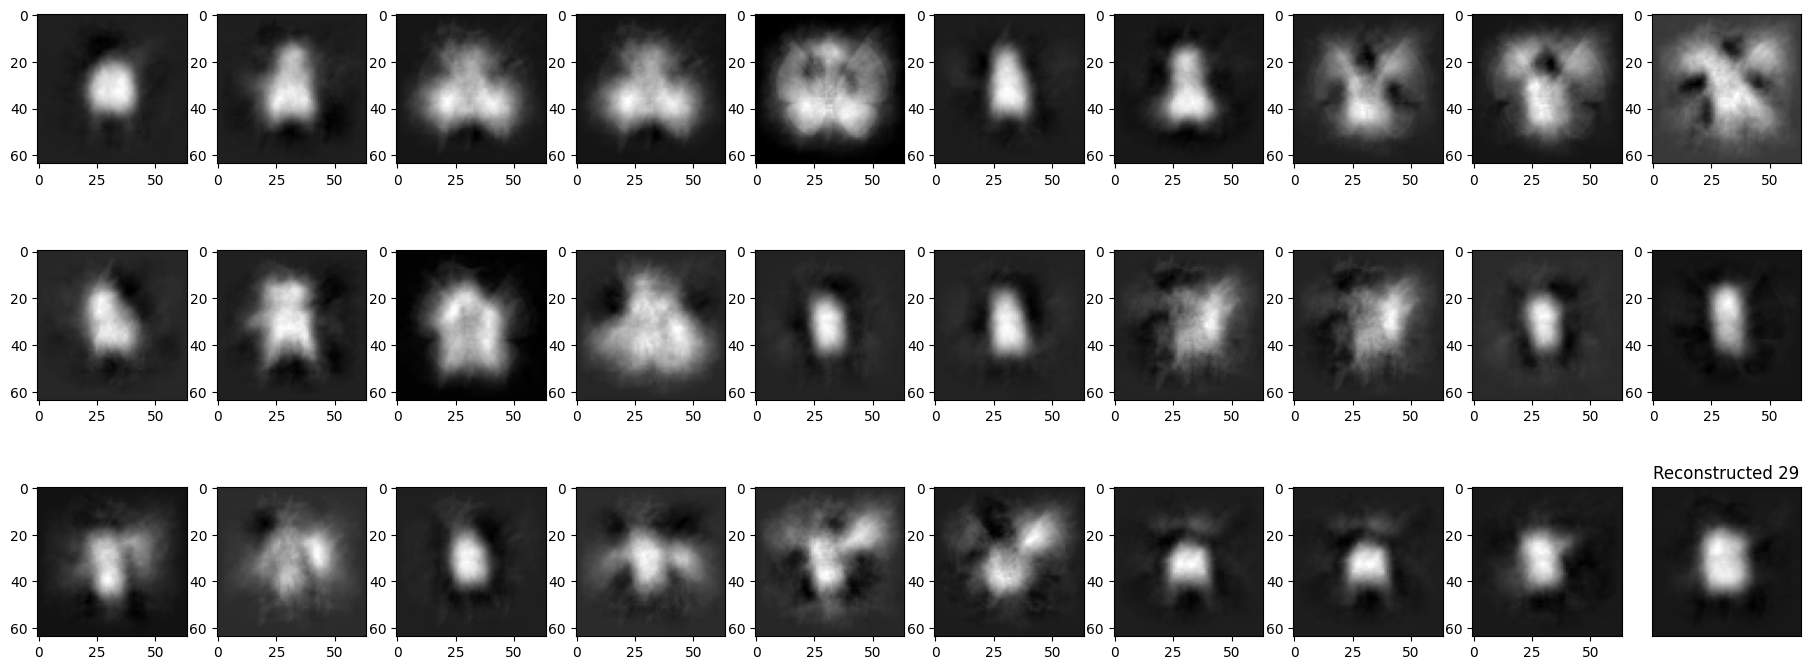

In [12]:
# Reconstruct images using first 15 principal components
Z, P, S = svd2pca(U, S, V, n_pc=15)
reconstructed_15 = np.dot(Z, P) + M
plot_gallery(reconstructed_15, ['Reconstructed {:d}'.format(i) for i in range(30)], h, w, 3, 10)


## Key Takeaways

This tutorial provided a hands-on approach to understanding PCA's theory and implementation, using Pokemon images as a practical example.

1. **Mathematics of PCA**: We explored the core math behind PCA, including centering the data, computing the covariance matrix, and leveraging Singular Value Decomposition (SVD) for efficiency.

2. **Python Implementation**: We developed Python functions for performing PCA and visualized 'Eigen-pokemon' to understand what principal components look like as images.

3. **Eigenvalue Interpretation**: Eigenvalues helped us quantify the importance of each principal component in capturing data variance.

4. **Image Reconstruction**: We showed how to reconstruct Pokemon images using varying numbers of principal components, revealing a trade-off between data compression and information loss.
